In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

In [4]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
315,1,3,female,26.0,0,0,7.8542,S
670,1,2,female,40.0,1,1,39.0000,S
559,1,3,female,36.0,1,0,17.4000,S
83,0,1,male,28.0,0,0,47.1000,S


In [6]:
# Analisis de variables
df['Survived'].value_counts() # Contar los valores de una columna

Survived
0    549
1    342
Name: count, dtype: int64

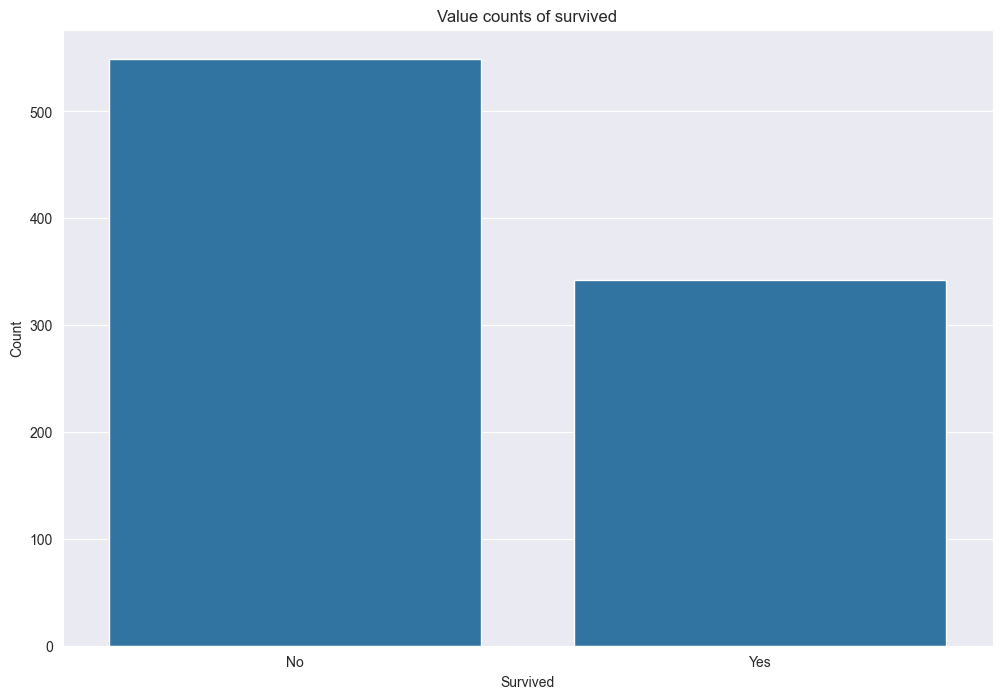

In [15]:
plt.figure(figsize=(12,8))

sns.barplot(x = df['Survived'].map({0: 'No', 1: 'Yes'}).value_counts().index, y=df['Survived'].value_counts()) # Mapear solamente para la visualizacion
plt.title('Value counts of survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [11]:
tasa = df['Survived'].sum() / len(df) * 100
print(f'Tasa de supervivientes: {tasa}')

Tasa de supervivientes: 38.38383838383838


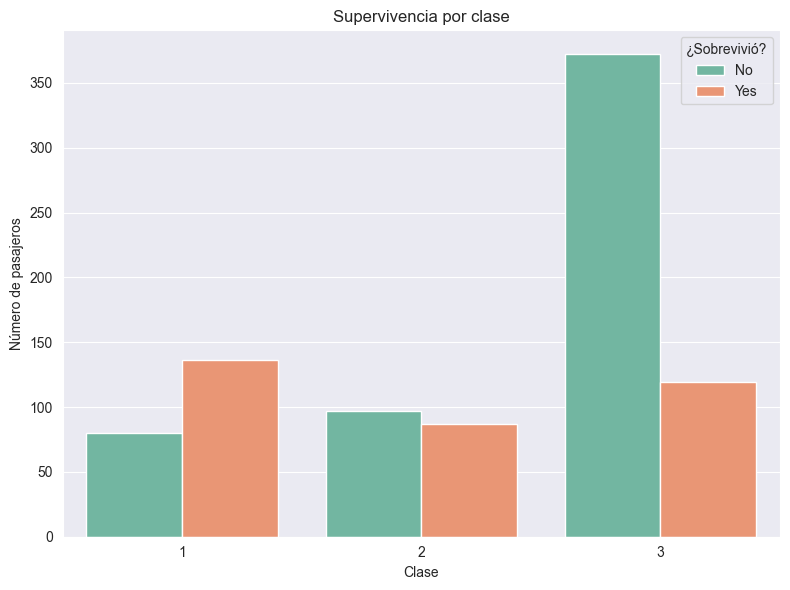

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear valores para visualización sin modificar el DataFrame
df_viz = df.copy()
df_viz['Survived'] = df_viz['Survived'].map({0: 'No', 1: 'Si'})

# Agrupar por clase y supervivencia
grupo = df_viz.groupby(['Pclass', 'Survived']).size().reset_index(name='Total')

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(data=grupo, x='Pclass', y='Total', hue='Survived', palette='Set2')

# Personalizar
plt.title('Supervivencia por clase')
plt.ylabel('Total')
plt.xlabel('Clase')
plt.legend(title='¿Sobrevivio?')
plt.tight_layout()
plt.show()

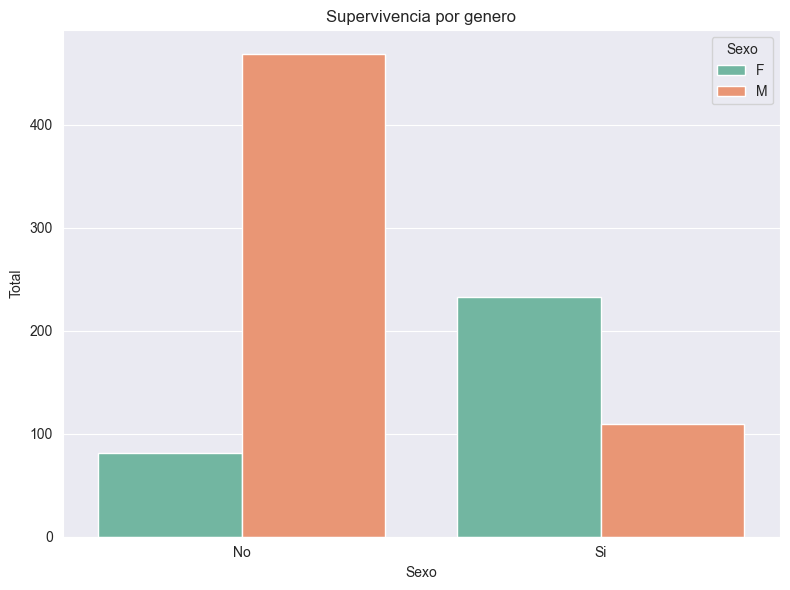

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear valores para visualización sin modificar el DataFrame
df_viz = df.copy()
df_viz['Survived'] = df_viz['Survived'].map({0: 'No', 1: 'Si'})
df_viz['Sex'] = df_viz['Sex'].map({'male': 'M', 'female':'F'})

# Agrupar por clase y supervivencia
grupo = df_viz.groupby(['Survived', 'Sex']).size().reset_index(name='Total')

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(data=grupo, x='Survived', y='Total', hue='Sex', palette='Set2')

# Personalizar
plt.title('Supervivencia por genero')
plt.ylabel('Total')
plt.xlabel('Sexo')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

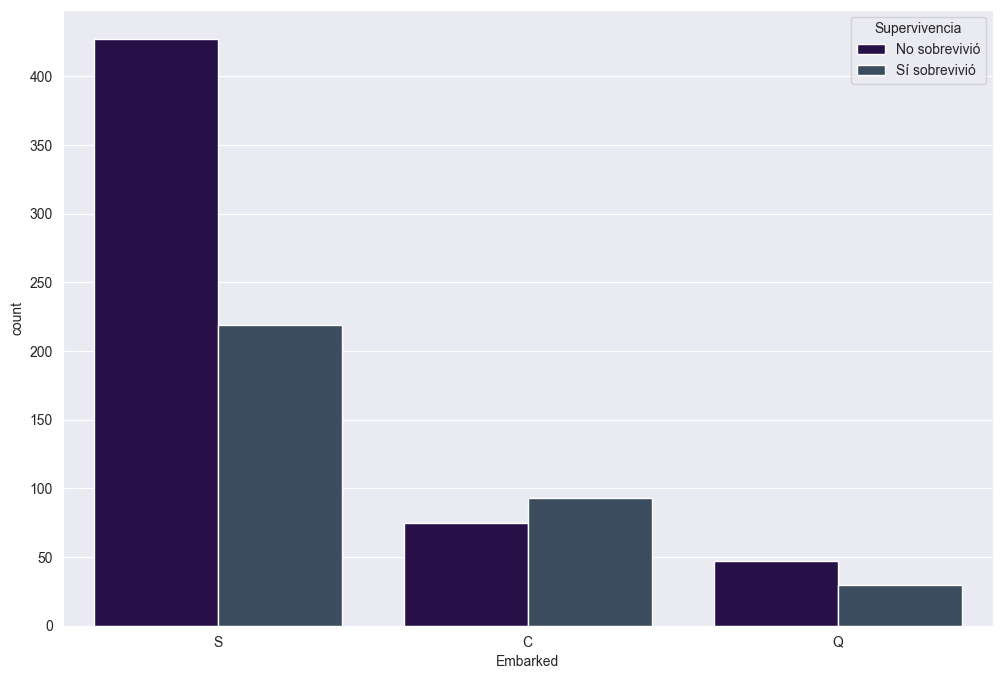

In [41]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color)
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

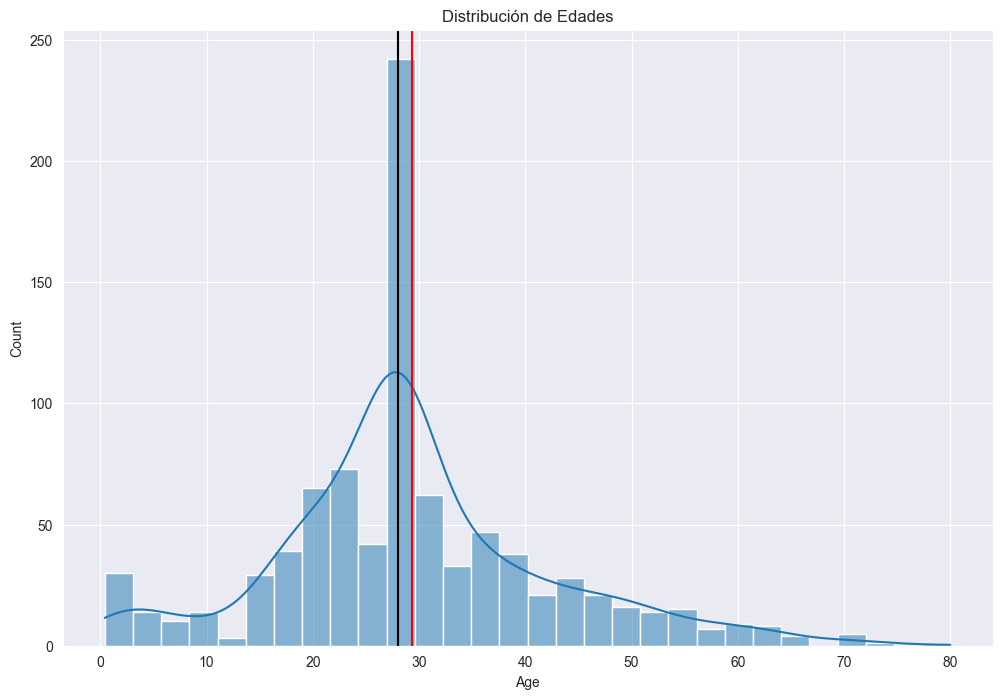

Media: 29.36158249158249
Mediana: 28.0
Moda: 28.0


In [42]:
# Distribucion de las edades
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

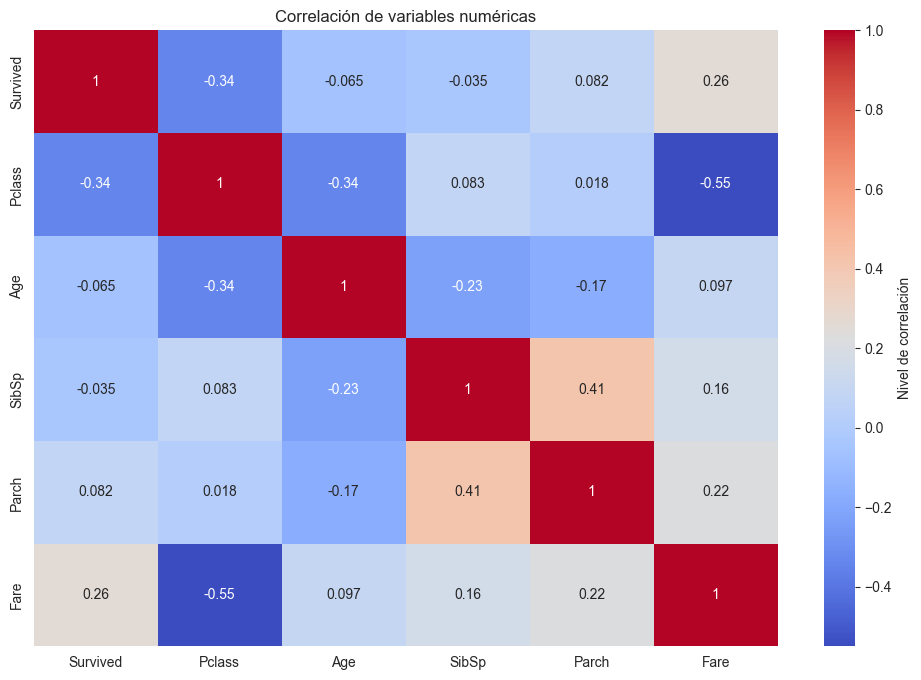

In [43]:
# Matriz de correlacion
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
            annot=True,
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()